**1. Setup the environment variables**

In [1]:
import pandas as pd
# Code to calculate total time
import time
start_time = time.time()

**2. Data Preparation**

In [2]:
%%time
file_loc = "listings.csv"
airbnb_schema = pd.read_csv(file_loc)

CPU times: user 341 ms, sys: 109 ms, total: 451 ms
Wall time: 495 ms


In [3]:
%%time
print(airbnb_schema.head(20))
print("Total number of records in the dataset - ", airbnb_schema.shape[0])

        id                          listing_url       scrape_id last_scraped   
0    17475   https://www.airbnb.com/rooms/17475  20231213195414   2023-12-14  \
1    18674   https://www.airbnb.com/rooms/18674  20231213195414   2023-12-14   
2   198958  https://www.airbnb.com/rooms/198958  20231213195414   2023-12-14   
3   199794  https://www.airbnb.com/rooms/199794  20231213195414   2023-12-14   
4    23197   https://www.airbnb.com/rooms/23197  20231213195414   2023-12-14   
5   206122  https://www.airbnb.com/rooms/206122  20231213195414   2023-12-14   
6    32711   https://www.airbnb.com/rooms/32711  20231213195414   2023-12-14   
7   206167  https://www.airbnb.com/rooms/206167  20231213195414   2023-12-14   
8   209673  https://www.airbnb.com/rooms/209673  20231213195414   2023-12-14   
9    34241   https://www.airbnb.com/rooms/34241  20231213195414   2023-12-14   
10  214970  https://www.airbnb.com/rooms/214970  20231213195414   2023-12-14   
11   34981   https://www.airbnb.com/room

**3. Print the dataset schema to understand the type of data we are dealing with.**

In [4]:
%%time
airbnb_schema.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18321 entries, 0 to 18320
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            18321 non-null  int64  
 1   listing_url                                   18321 non-null  object 
 2   scrape_id                                     18321 non-null  int64  
 3   last_scraped                                  18321 non-null  object 
 4   source                                        18321 non-null  object 
 5   name                                          18321 non-null  object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         10048 non-null  object 
 8   picture_url                                   18321 non-null  object 
 9   host_id                                       18321 non-null 

In [5]:
%%time
# Check for count of null values in each column of the dataframe.
null_counts = airbnb_schema.isnull().sum()
print("Count of null values for each feature: ")
print(null_counts)

Count of null values for each feature: 
id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               4369
Length: 75, dtype: int64
CPU times: user 27.7 ms, sys: 0 ns, total: 27.7 ms
Wall time: 27.2 ms


*We see that there are a lot of nulls by observing the first 20 rows of the dataset above. So, we checked the count of null values in each column of the dataset.*

**3. Drop some columns which are not important for analyzing the data.**

In [6]:
%%time
columns = ["name", "host_id", "neighbourhood_group_cleansed", "neighbourhood_cleansed", "latitude", "longitude", "room_type", "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]
airbnb_schema = airbnb_schema[columns]

CPU times: user 4.97 ms, sys: 4.2 ms, total: 9.17 ms
Wall time: 9.25 ms


In [7]:
%%time
airbnb_schema.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18321 entries, 0 to 18320
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            18321 non-null  object 
 1   host_id                         18321 non-null  int64  
 2   neighbourhood_group_cleansed    18321 non-null  object 
 3   neighbourhood_cleansed          18321 non-null  object 
 4   latitude                        18321 non-null  float64
 5   longitude                       18321 non-null  float64
 6   room_type                       18321 non-null  object 
 7   price                           16056 non-null  object 
 8   minimum_nights                  18321 non-null  int64  
 9   number_of_reviews               18321 non-null  int64  
 10  reviews_per_month               13952 non-null  float64
 11  calculated_host_listings_count  18321 non-null  int64  
 12  availability_365                

The column 'price' has the data type of 'object' as we saw with info(). Each data instance of the column has the format of '%d$'. We first have to convert the data type of the column to 'int' before further analysis.

In [8]:
%%time
airbnb_schema['price'].dtypes

CPU times: user 73 µs, sys: 0 ns, total: 73 µs
Wall time: 76.1 µs


dtype('O')

Before converting, process NULL values.

In [9]:
%%time
airbnb_schema['price'] = airbnb_schema['price'].fillna(0)
print(airbnb_schema['price'].isnull().sum())

0
CPU times: user 4.12 ms, sys: 58 µs, total: 4.18 ms
Wall time: 4.15 ms


In [10]:
%%time
airbnb_schema['price'] = airbnb_schema['price'].replace('[\$,]', '', regex=True).astype(float)
airbnb_schema['price'] = airbnb_schema['price'].astype(int)
airbnb_schema.head()
airbnb_schema['price'].dtypes

CPU times: user 20.4 ms, sys: 226 µs, total: 20.7 ms
Wall time: 20.6 ms


dtype('int64')

**4. Clean the null values from review_per_month. We will replace all the null values with zero as "null" reviews_per_month.**

In [11]:
%%time
airbnb_schema['reviews_per_month'] = airbnb_schema['reviews_per_month'].fillna(0)
print(airbnb_schema['reviews_per_month'].isnull().sum())

0
CPU times: user 1.75 ms, sys: 470 µs, total: 2.22 ms
Wall time: 2.15 ms


**5. Analyze the host id field.** 

Count the number of listings for each host ID.

Sort the results in descending order, so we can see the top 20 hosts.

In [12]:
%%time
host_id_counts = airbnb_schema.groupby('host_id').size().reset_index(name='count')

# Sort by count in descending order
host_id_counts_sorted = host_id_counts.sort_values(by='count', ascending=False)
host_id_counts_sorted.head(20)

CPU times: user 5.11 ms, sys: 0 ns, total: 5.11 ms
Wall time: 5.62 ms


,host_id,count
5763,346367515,318
5806,357946540,271
2429,32037490,231
723,4459553,179
239,1447144,174
6294,461820156,150
5215,265193861,148
224,1391607,142
45,299462,141
2562,36607755,136


*The above analysis shows that the top host (host_id = 346367515) has 318 listings and also there is a good spread in the number of listings with each host.*

*We can confirm this finding by checking the 'calculated_host_listings_count' column which has a maximum value of 318.*

**6. Check the max value from calculated_host_listings_count column**

In [13]:
%%time
# Check the max value from calculated_host_listings_count column
max_value = airbnb_schema['calculated_host_listings_count'].max()

# Display the result
print("Max value from calculated_host_listings_count column:", max_value)

Max value from calculated_host_listings_count column: 318
CPU times: user 1.05 ms, sys: 0 ns, total: 1.05 ms
Wall time: 905 µs


**7. Counting the number of unique listings:**

There are 6256 unique listings in the dataset.

In [14]:
%%time
print(airbnb_schema['name'].nunique())

6256
CPU times: user 5.58 ms, sys: 0 ns, total: 5.58 ms
Wall time: 5.58 ms


**8. Distinct neighbourhood group count**

In [15]:
%%time
print(airbnb_schema["neighbourhood_group_cleansed"].nunique())

10
CPU times: user 1.86 ms, sys: 0 ns, total: 1.86 ms
Wall time: 1.5 ms


**9. Distinct neighbourhood group**

In [16]:
%%time
neighbourhood_group_data = airbnb_schema.groupby("neighbourhood_group_cleansed").size().reset_index(name='count')
neighbourhood_group_data.head(20)

CPU times: user 3.99 ms, sys: 0 ns, total: 3.99 ms
Wall time: 4.08 ms


,neighbourhood_group_cleansed,count
0,Ciutat Vella,4357
1,Eixample,6575
2,Gràcia,1571
3,Horta-Guinardó,525
4,Les Corts,369
5,Nou Barris,210
6,Sant Andreu,279
7,Sant Martí,1639
8,Sants-Montjuïc,1902
9,Sarrià-Sant Gervasi,894


**10. Showing the above data as a pie chart to understand the division clearly.**

CPU times: user 414 ms, sys: 34.5 ms, total: 448 ms
Wall time: 522 ms


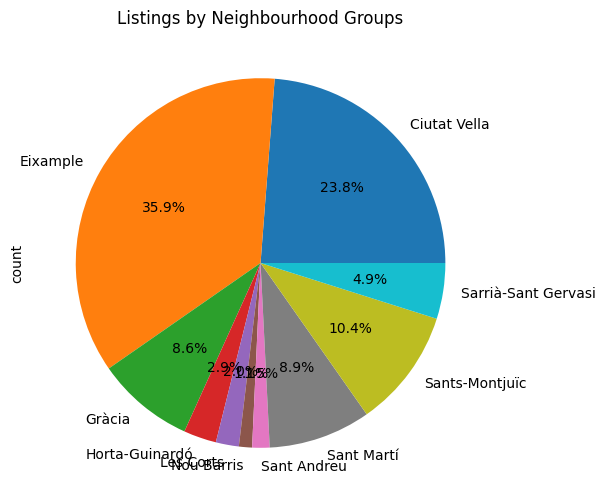

In [17]:
%%time
neighbourhood_group_data.set_index('neighbourhood_group_cleansed', inplace=True)
plt = neighbourhood_group_data.plot.pie(y='count', autopct='%1.1f%%', legend = False, title='Listings by Neighbourhood Groups', figsize=(16,6))


**11. Distinct neighbourhood count**

In [18]:
%%time
print(airbnb_schema["neighbourhood_cleansed"].nunique())

71
CPU times: user 2.43 ms, sys: 541 µs, total: 2.97 ms
Wall time: 2.34 ms


**12. Distinct neighbourhood**

In [19]:
%%time
distinct_nei = airbnb_schema.groupby("neighbourhood_cleansed").size().reset_index(name='count')
distinct_nei.head(20)

CPU times: user 3 ms, sys: 3.73 ms, total: 6.73 ms
Wall time: 3.51 ms


,neighbourhood_cleansed,count
0,Can Baró,41
1,Can Peguera,3
2,Canyelles,1
3,Diagonal Mar i el Front Marítim del Poblenou,143
4,Horta,26
5,Hostafrancs,230
6,Montbau,12
7,Navas,76
8,Pedralbes,39
9,Porta,32


In [20]:
%%time
sorted_distinct_nei = distinct_nei.sort_values(by='count', ascending=False)
sorted_distinct_nei.head(5)

CPU times: user 712 µs, sys: 162 µs, total: 874 µs
Wall time: 856 µs


,neighbourhood_cleansed,count
49,la Dreta de l'Eixample,2239
43,el Raval,1474
28,el Barri Gòtic,1282
17,"Sant Pere, Santa Caterina i la Ribera",1179
67,la Vila de Gràcia,1066


**13. Analysis of availability of apartments.**

In [21]:
%%time
avail_df = airbnb_schema.groupby("availability_365").size().reset_index(name='count')
avail_df_sorted = avail_df.sort_values(by='availability_365')
avail_df_sorted.head(20)

CPU times: user 2.2 ms, sys: 3.56 ms, total: 5.77 ms
Wall time: 3.05 ms


,availability_365,count
0,0,4180
1,1,50
2,2,28
3,3,22
4,4,24
5,5,23
6,6,18
7,7,65
8,8,34
9,9,35


**14. Distinct host id**

In [22]:
%%time
print(airbnb_schema['host_id'].nunique())

7016
CPU times: user 1.1 ms, sys: 251 µs, total: 1.35 ms
Wall time: 1.25 ms


**15. Number of apartments under different room type**

Find all different room types

In [23]:
%%time
unique_rooms = airbnb_schema["room_type"].unique()
print(unique_rooms)

['Entire home/apt' 'Private room' 'Hotel room' 'Shared room']
CPU times: user 1.85 ms, sys: 0 ns, total: 1.85 ms
Wall time: 1.66 ms


In [24]:
%%time
# Number of apartments under different room type
room_type_data = airbnb_schema[airbnb_schema['room_type'].isin(["Private room", "Entire home/apt", "Shared room", "Hotel room"])]
room_type_data = room_type_data.groupby('room_type').size().reset_index(name='count')
room_type_data = room_type_data.sort_values(by='room_type', ascending=False)
room_type_data.head()

CPU times: user 4.8 ms, sys: 3.1 ms, total: 7.9 ms
Wall time: 7.79 ms


,room_type,count
3,Shared room,161
2,Private room,7275
1,Hotel room,134
0,Entire home/apt,10751


**16. Showing a general preference based on the room types. As we can see, most people prefer an Entire home/apt followed by Private Room and very few Shared rooms**

CPU times: user 24.7 ms, sys: 8.12 ms, total: 32.8 ms
Wall time: 33.1 ms


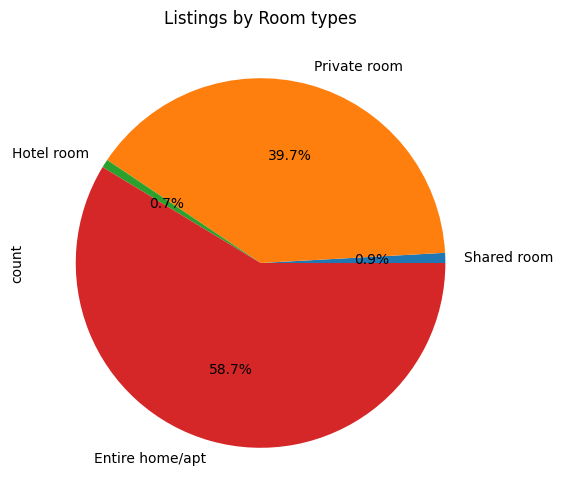

In [25]:
%%time
room_type_data.set_index('room_type', inplace=True)
plt = room_type_data.plot.pie(y='count', autopct='%1.1f%%', legend = False, title='Listings by Room types', figsize=(16,6))

**17. Combining room_type with neighbourhoodt**

In [26]:
%%time
neigh_room_type_schema = airbnb_schema.loc[:, ["neighbourhood_cleansed", "room_type"]]
neigh_room_type_schema.head(20)

CPU times: user 2.37 ms, sys: 580 µs, total: 2.95 ms
Wall time: 2.6 ms


,neighbourhood_cleansed,room_type
0,la Dreta de l'Eixample,Entire home/apt
1,la Sagrada Família,Entire home/apt
2,Diagonal Mar i el Front Marítim del Poblenou,Entire home/apt
3,l'Antiga Esquerra de l'Eixample,Private room
4,el Besòs i el Maresme,Entire home/apt
5,la Vila de Gràcia,Entire home/apt
6,el Camp d'en Grassot i Gràcia Nova,Entire home/apt
7,el Poble Sec,Entire home/apt
8,la Vila de Gràcia,Entire home/apt
9,el Barri Gòtic,Entire home/apt


**18. Below table shows room type by neighbourhood group**

In [27]:
%%time
# room type by neighbourhood group.
neighbourhoodgrp_roomtype = airbnb_schema.groupby(["neighbourhood_group_cleansed", "room_type"]).size().reset_index(name='count')
neighbourhoodgrp_roomtype.head(20)

CPU times: user 3.43 ms, sys: 4.81 ms, total: 8.24 ms
Wall time: 13.3 ms


,neighbourhood_group_cleansed,room_type,count
0,Ciutat Vella,Entire home/apt,2343
1,Ciutat Vella,Hotel room,25
2,Ciutat Vella,Private room,1981
3,Ciutat Vella,Shared room,8
4,Eixample,Entire home/apt,4091
5,Eixample,Hotel room,84
6,Eixample,Private room,2323
7,Eixample,Shared room,77
8,Gràcia,Entire home/apt,997
9,Gràcia,Hotel room,11


**19. Showing the distribution of room types based on the neighbourhood group. From this we can get an idea of what room type are most popular in respective neighbourhood group. This is very important data for someone who would like to setup a new listing or update an existing one.**

CPU times: user 83.7 ms, sys: 26.9 ms, total: 111 ms
Wall time: 94.7 ms


<Axes: xlabel='neighbourhood_group_cleansed'>

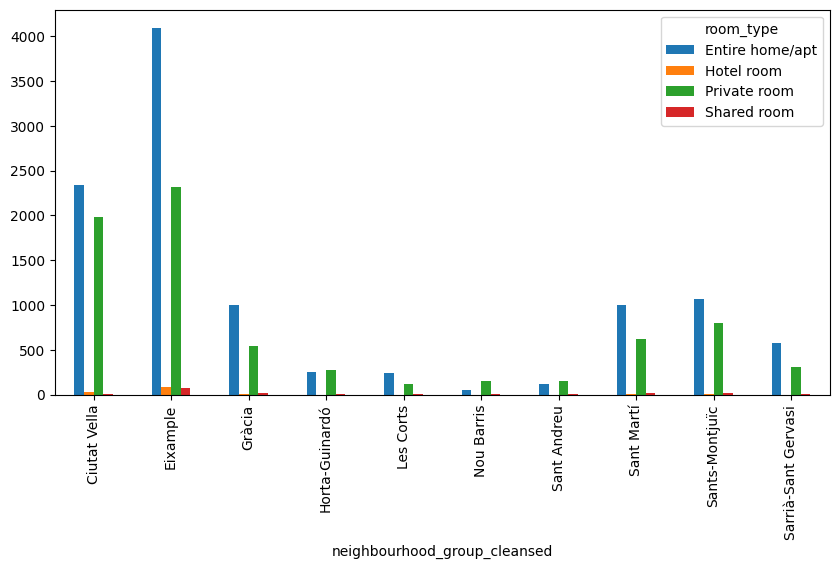

In [28]:
%%time
pd.pivot_table(neighbourhoodgrp_roomtype, index='neighbourhood_group_cleansed', columns='room_type', values='count').plot.bar(figsize=(10,5))


**20. Combining neighbourhood with neighbourhood group**

In [29]:
%%time
nei_group_nei_schema = airbnb_schema.loc[:, ["neighbourhood_group_cleansed", "neighbourhood_cleansed"]]
nei_group_nei_schema= nei_group_nei_schema.sort_values(by='neighbourhood_group_cleansed', ascending=False)
nei_group_nei_schema.head(20)

CPU times: user 11.6 ms, sys: 0 ns, total: 11.6 ms
Wall time: 11.6 ms


,neighbourhood_group_cleansed,neighbourhood_cleansed
9160,Sarrià-Sant Gervasi,Sant Gervasi - Galvany
8600,Sarrià-Sant Gervasi,Sant Gervasi - Galvany
14349,Sarrià-Sant Gervasi,Sant Gervasi - Galvany
14352,Sarrià-Sant Gervasi,Sant Gervasi - Galvany
8670,Sarrià-Sant Gervasi,Sant Gervasi - Galvany
14357,Sarrià-Sant Gervasi,Sant Gervasi - Galvany
14359,Sarrià-Sant Gervasi,Sant Gervasi - Galvany
14360,Sarrià-Sant Gervasi,Sant Gervasi - Galvany
8668,Sarrià-Sant Gervasi,Sant Gervasi - Galvany
14364,Sarrià-Sant Gervasi,Sant Gervasi - Galvany


**21. Find the popular neighbourhood groups:**

Popular neighbourhood_groups are Eixample, Ciutat Vella, Sants-Montjuïc, Sant Martí, Gràcia

In [30]:

%%time
new_nei_group_nei_schema = nei_group_nei_schema.groupby("neighbourhood_group_cleansed").size().reset_index(name='count')
new_nei_group_nei_schema = new_nei_group_nei_schema.sort_values(by='count', ascending=False)
new_nei_group_nei_schema.head(20)

CPU times: user 3.08 ms, sys: 777 µs, total: 3.86 ms
Wall time: 3.79 ms


,neighbourhood_group_cleansed,count
1,Eixample,6575
0,Ciutat Vella,4357
8,Sants-Montjuïc,1902
7,Sant Martí,1639
2,Gràcia,1571
9,Sarrià-Sant Gervasi,894
3,Horta-Guinardó,525
4,Les Corts,369
6,Sant Andreu,279
5,Nou Barris,210


Above we check which neighbourhood group is the most popular based on the number of listings in that group. Also, how the count varies for other neighbourhood groups. **The result shows that Eixample is the most popular neighbourhood group for people**. 

**22. Number of neighbourhood in popular neighbourhood_groups**


In [31]:
%%time
eixample_nei = nei_group_nei_schema[nei_group_nei_schema['neighbourhood_group_cleansed'].str.contains('Eixample', case=False)].groupby("neighbourhood_cleansed").size().reset_index(name='count').sort_values(by='count', ascending=False)
ciutat_nei = nei_group_nei_schema[nei_group_nei_schema['neighbourhood_group_cleansed'].str.contains('Ciutat Vella', case=False)].groupby("neighbourhood_cleansed").size().reset_index(name='count').sort_values(by='count', ascending=False)
montjuic_nei = nei_group_nei_schema[nei_group_nei_schema['neighbourhood_group_cleansed'].str.contains('Sants-Montjuïc', case=False)].groupby("neighbourhood_cleansed").size().reset_index(name='count').sort_values(by='count', ascending=False)
marti_nei = nei_group_nei_schema[nei_group_nei_schema['neighbourhood_group_cleansed'].str.contains('Sant Martí', case=False)].groupby("neighbourhood_cleansed").size().reset_index(name='count').sort_values(by='count', ascending=False)
gracia_nei = nei_group_nei_schema[nei_group_nei_schema['neighbourhood_group_cleansed'].str.contains('Gràcia', case=False)].groupby("neighbourhood_cleansed").size().reset_index(name='count').sort_values(by='count', ascending=False)

print("Eixample:")
print(eixample_nei)
print("\nCiutat Vella:")
print(ciutat_nei)
print("\nMontjuïc:")
print(montjuic_nei)
print("\nSant Martí:")
print(marti_nei)
print("\nGràcia:")
print(gracia_nei)

Eixample:
            neighbourhood_cleansed  count
3           la Dreta de l'Eixample   2239
2  l'Antiga Esquerra de l'Eixample   1062
5               la Sagrada Família   1053
0                      Sant Antoni    905
4   la Nova Esquerra de l'Eixample    803
1                    el Fort Pienc    513

Ciutat Vella:
                  neighbourhood_cleansed  count
2                               el Raval   1474
1                         el Barri Gòtic   1282
0  Sant Pere, Santa Caterina i la Ribera   1179
3                         la Barceloneta    422

Montjuïc:
       neighbourhood_cleansed  count
3                el Poble Sec    851
1                       Sants    352
0                 Hostafrancs    230
2               Sants - Badal    229
5       la Font de la Guatlla    105
4                  la Bordeta     71
6           la Marina de Port     58
7  la Marina del Prat Vermell      6

Sant Martí:
                         neighbourhood_cleansed  count
7                            

**23. Combining neighbourhood_group, neighbourhood and room_type**

In [32]:
%%time
neigh_group_neigh_room_type_schema = airbnb_schema[["neighbourhood_group_cleansed", "neighbourhood_cleansed", "room_type"]]

CPU times: user 1.99 ms, sys: 0 ns, total: 1.99 ms
Wall time: 2.07 ms


**24. Distribution of rooms in various neighbourhood in  Eixample.**

In [33]:
%%time
eixample_nei_private = neigh_group_neigh_room_type_schema[(neigh_group_neigh_room_type_schema['neighbourhood_group_cleansed'] == 'Eixample') & (neigh_group_neigh_room_type_schema['room_type'] == 'Private room')].groupby("neighbourhood_cleansed").size().reset_index(name='count').sort_values(by='count', ascending=False)
eixample_nei_shared = neigh_group_neigh_room_type_schema[(neigh_group_neigh_room_type_schema['neighbourhood_group_cleansed'] == 'Eixample') & (neigh_group_neigh_room_type_schema['room_type'] == 'Shared room')].groupby("neighbourhood_cleansed").size().reset_index(name='count').sort_values(by='count', ascending=False)
eixample_nei_hotel = neigh_group_neigh_room_type_schema[(neigh_group_neigh_room_type_schema['neighbourhood_group_cleansed'] == 'Eixample') & (neigh_group_neigh_room_type_schema['room_type'] == 'Hotel room')].groupby("neighbourhood_cleansed").size().reset_index(name='count').sort_values(by='count', ascending=False)
eixample_nei_entire_home = neigh_group_neigh_room_type_schema[(neigh_group_neigh_room_type_schema['neighbourhood_group_cleansed'] == 'Eixample') & (neigh_group_neigh_room_type_schema['room_type'] == 'Entire home/apt')].groupby("neighbourhood_cleansed").size().reset_index(name='count').sort_values(by='count', ascending=False)

# Display the results
print("Showing distribution for room_type = 'Private room' in Eixample")
print(eixample_nei_private)
print("\nShowing distribution for room_type = 'Shared room' in Eixample")
print(eixample_nei_shared)
print("\nShowing distribution for room_type = 'Hotel room' in Eixample")
print(eixample_nei_hotel)
print("\nShowing distribution for room_type = 'Entire home/apt' in Eixample")
print(eixample_nei_entire_home)


Showing distribution for room_type = 'Private room' in Eixample
            neighbourhood_cleansed  count
3           la Dreta de l'Eixample    738
4   la Nova Esquerra de l'Eixample    370
2  l'Antiga Esquerra de l'Eixample    366
0                      Sant Antoni    347
5               la Sagrada Família    288
1                    el Fort Pienc    214

Showing distribution for room_type = 'Shared room' in Eixample
            neighbourhood_cleansed  count
2           la Dreta de l'Eixample     35
1  l'Antiga Esquerra de l'Eixample     22
3   la Nova Esquerra de l'Eixample     13
4               la Sagrada Família      5
0                    el Fort Pienc      2

Showing distribution for room_type = 'Hotel room' in Eixample
            neighbourhood_cleansed  count
2           la Dreta de l'Eixample     34
1  l'Antiga Esquerra de l'Eixample     22
0                      Sant Antoni     15
4               la Sagrada Família      8
3   la Nova Esquerra de l'Eixample      5

Showing di

**25. Distribution of rooms in various neighbourhood in Ciutat Vella.**

In [34]:

%%time
ciutat_nei_private = neigh_group_neigh_room_type_schema[(neigh_group_neigh_room_type_schema['neighbourhood_group_cleansed'] == 'Ciutat Vella') & (neigh_group_neigh_room_type_schema['room_type'] == 'Private room')].groupby("neighbourhood_cleansed").size().reset_index(name='count').sort_values(by='count', ascending=False)
ciutat_nei_shared = neigh_group_neigh_room_type_schema[(neigh_group_neigh_room_type_schema['neighbourhood_group_cleansed'].str.contains('Ciutat Vella', case=False)) & (neigh_group_neigh_room_type_schema['room_type'] == 'Shared room')].groupby("neighbourhood_cleansed").size().reset_index(name='count').sort_values(by='count', ascending=False)
ciutat_nei_hotel = neigh_group_neigh_room_type_schema[(neigh_group_neigh_room_type_schema['neighbourhood_group_cleansed'] == 'Ciutat Vella') & (neigh_group_neigh_room_type_schema['room_type'] == 'Hotel room')].groupby("neighbourhood_cleansed").size().reset_index(name='count').sort_values(by='count', ascending=False)
ciutat_nei_entire_home = neigh_group_neigh_room_type_schema[(neigh_group_neigh_room_type_schema['neighbourhood_group_cleansed'] == 'Ciutat Vella') & (neigh_group_neigh_room_type_schema['room_type'] == 'Entire home/apt')].groupby("neighbourhood_cleansed").size().reset_index(name='count').sort_values(by='count', ascending=False)

print("Showing distribution for room_type = 'Private room' in Ciutat Vella")
print(ciutat_nei_private)
print("\nShowing distribution for room_type = 'Shared room' in Ciutat Vella")
print(ciutat_nei_shared)
print("\nShowing distribution for room_type = 'Hotel room' in Ciutat Vella")
print(ciutat_nei_hotel)
print("\nShowing distribution for room_type = 'Entire home/apt' in Ciutat Vella")
print(ciutat_nei_entire_home)

Showing distribution for room_type = 'Private room' in Ciutat Vella
                  neighbourhood_cleansed  count
2                               el Raval    773
1                         el Barri Gòtic    642
0  Sant Pere, Santa Caterina i la Ribera    450
3                         la Barceloneta    116

Showing distribution for room_type = 'Shared room' in Ciutat Vella
  neighbourhood_cleansed  count
1               el Raval      5
0         el Barri Gòtic      2
2         la Barceloneta      1

Showing distribution for room_type = 'Hotel room' in Ciutat Vella
                  neighbourhood_cleansed  count
0  Sant Pere, Santa Caterina i la Ribera     18
2                               el Raval      6
1                         el Barri Gòtic      1

Showing distribution for room_type = 'Entire home/apt' in Ciutat Vella
                  neighbourhood_cleansed  count
0  Sant Pere, Santa Caterina i la Ribera    711
2                               el Raval    690
1                    

**26. Distribution of rooms in various neighbourhood in Sants-Montjuïc.**

In [35]:
%%time
montjuic_nei_shared = neigh_group_neigh_room_type_schema[(neigh_group_neigh_room_type_schema['neighbourhood_group_cleansed'] == 'Sants-Montjuïc') & (neigh_group_neigh_room_type_schema['room_type'] == 'Shared room')].groupby("neighbourhood_cleansed").size().reset_index(name='count').sort_values(by='count', ascending=False)
montjuic_nei_hotel = neigh_group_neigh_room_type_schema[(neigh_group_neigh_room_type_schema['neighbourhood_group_cleansed'] == 'Sants-Montjuïc') & (neigh_group_neigh_room_type_schema['room_type'] == 'Hotel room')].groupby("neighbourhood_cleansed").size().reset_index(name='count').sort_values(by='count', ascending=False)
montjuic_nei_entire_home = neigh_group_neigh_room_type_schema[(neigh_group_neigh_room_type_schema['neighbourhood_group_cleansed'] == 'Sants-Montjuïc') & (neigh_group_neigh_room_type_schema['room_type'] == 'Entire home/apt')].groupby("neighbourhood_cleansed").size().reset_index(name='count').sort_values(by='count', ascending=False)
montjuic_nei_private = neigh_group_neigh_room_type_schema[(neigh_group_neigh_room_type_schema['neighbourhood_group_cleansed'] == 'Sants-Montjuïc') & (neigh_group_neigh_room_type_schema['room_type'] == 'Private room')].groupby("neighbourhood_cleansed").size().reset_index(name='count').sort_values(by='count', ascending=False)

print("Showing distribution for room_type = 'Private room' in Sants-Montjuïc")
print(montjuic_nei_private)
print("\nShowing distribution for room_type = 'Shared room' in Sants-Montjuïc")
print(montjuic_nei_shared)
print("\nShowing distribution for room_type = 'Hotel room' in Sants-Montjuïc")
print(montjuic_nei_hotel)
print("\nShowing distribution for room_type = 'Entire home/apt' in Sants-Montjuïc")
print(montjuic_nei_entire_home)

Showing distribution for room_type = 'Private room' in Sants-Montjuïc
       neighbourhood_cleansed  count
3                el Poble Sec    292
1                       Sants    153
2               Sants - Badal    104
0                 Hostafrancs     94
5       la Font de la Guatlla     59
6           la Marina de Port     51
4                  la Bordeta     49
7  la Marina del Prat Vermell      2

Showing distribution for room_type = 'Shared room' in Sants-Montjuïc
  neighbourhood_cleansed  count
1           el Poble Sec      9
0          Sants - Badal      4
3      la Marina de Port      2
2  la Font de la Guatlla      1

Showing distribution for room_type = 'Hotel room' in Sants-Montjuïc
  neighbourhood_cleansed  count
1           el Poble Sec      7
2  la Font de la Guatlla      2
0          Sants - Badal      1

Showing distribution for room_type = 'Entire home/apt' in Sants-Montjuïc
       neighbourhood_cleansed  count
3                el Poble Sec    543
1                     

**27. Distribution of rooms in various neighbourhood in Sant Martí.**

In [36]:
%%time
marti_nei_private = neigh_group_neigh_room_type_schema[(neigh_group_neigh_room_type_schema['neighbourhood_group_cleansed'] == 'Sant Martí') & (neigh_group_neigh_room_type_schema['room_type'] == 'Private room')].groupby("neighbourhood_cleansed").size().reset_index(name='count').sort_values(by='count', ascending=False)
marti_nei_shared = neigh_group_neigh_room_type_schema[(neigh_group_neigh_room_type_schema['neighbourhood_group_cleansed'] == 'Sant Martí') & (neigh_group_neigh_room_type_schema['room_type'] == 'Shared room')].groupby("neighbourhood_cleansed").size().reset_index(name='count').sort_values(by='count', ascending=False)
marti_nei_hotel = neigh_group_neigh_room_type_schema[(neigh_group_neigh_room_type_schema['neighbourhood_group_cleansed'] == 'Sant Martí') & (neigh_group_neigh_room_type_schema['room_type'] == 'Hotel room')].groupby("neighbourhood_cleansed").size().reset_index(name='count').sort_values(by='count', ascending=False)
marti_nei_entire_home = neigh_group_neigh_room_type_schema[(neigh_group_neigh_room_type_schema['neighbourhood_group_cleansed'] == 'Sant Martí') & (neigh_group_neigh_room_type_schema['room_type'] == 'Entire home/apt')].groupby("neighbourhood_cleansed").size().reset_index(name='count').sort_values(by='count', ascending=False)

print("Showing distribution for room_type = 'Private room' in Sant Martí")
print(marti_nei_private)
print("\nShowing distribution for room_type = 'Shared room' in Sant Martí")
print(marti_nei_shared)
print("\nShowing distribution for room_type = 'Hotel room' in Sant Martí")
print(marti_nei_hotel)
print("\nShowing distribution for room_type = 'Entire home/apt' in Sant Martí")
print(marti_nei_entire_home)


Showing distribution for room_type = 'Private room' in Sant Martí
                         neighbourhood_cleansed  count
7                                   el Poblenou    124
4                    el Camp de l'Arpa del Clot    121
5                                       el Clot     65
6             el Parc i la Llacuna del Poblenou     63
2                      Sant Martí de Provençals     55
3                         el Besòs i el Maresme     55
9                 la Vila Olímpica del Poblenou     39
1                       Provençals del Poblenou     38
8                           la Verneda i la Pau     36
0  Diagonal Mar i el Front Marítim del Poblenou     25

Showing distribution for room_type = 'Shared room' in Sant Martí
              neighbourhood_cleansed  count
2         el Camp de l'Arpa del Clot      9
6      la Vila Olímpica del Poblenou      3
0            Provençals del Poblenou      1
1              el Besòs i el Maresme      1
3                            el Clot      1

**28. Distribution of rooms in various neighbourhood in Gràcia.**

In [37]:
%%time
gracia_nei_private = neigh_group_neigh_room_type_schema[(neigh_group_neigh_room_type_schema['neighbourhood_group_cleansed'] == 'Gràcia') & (neigh_group_neigh_room_type_schema['room_type'] == 'Private room')].groupby("neighbourhood_cleansed").size().reset_index(name='count').sort_values(by='count', ascending=False)
gracia_nei_shared = neigh_group_neigh_room_type_schema[(neigh_group_neigh_room_type_schema['neighbourhood_group_cleansed'] == 'Gràcia') & (neigh_group_neigh_room_type_schema['room_type'] == 'Shared room')].groupby("neighbourhood_cleansed").size().reset_index(name='count').sort_values(by='count', ascending=False)
gracia_nei_hotel = neigh_group_neigh_room_type_schema[(neigh_group_neigh_room_type_schema['neighbourhood_group_cleansed'] == 'Gràcia') & (neigh_group_neigh_room_type_schema['room_type'] == 'Hotel room')].groupby("neighbourhood_cleansed").size().reset_index(name='count').sort_values(by='count', ascending=False)
gracia_nei_entire_home = neigh_group_neigh_room_type_schema[(neigh_group_neigh_room_type_schema['neighbourhood_group_cleansed'] == 'Gràcia') & (neigh_group_neigh_room_type_schema['room_type'] == 'Entire home/apt')].groupby("neighbourhood_cleansed").size().reset_index(name='count').sort_values(by='count', ascending=False)

print("Showing distribution for room_type = 'Private room' in Gràcia")
print(gracia_nei_private)
print("\nShowing distribution for room_type = 'Shared room' in Gràcia")
print(gracia_nei_shared)
print("\nShowing distribution for room_type = 'Hotel room' in Gràcia")
print(gracia_nei_hotel)
print("\nShowing distribution for room_type = 'Entire home/apt' in Gràcia")
print(gracia_nei_entire_home)


Showing distribution for room_type = 'Private room' in Gràcia
               neighbourhood_cleansed  count
4                   la Vila de Gràcia    345
1  el Camp d'en Grassot i Gràcia Nova    105
0           Vallcarca i els Penitents     43
3                            la Salut     40
2                             el Coll     10

Showing distribution for room_type = 'Shared room' in Gràcia
               neighbourhood_cleansed  count
2                   la Vila de Gràcia     18
0           Vallcarca i els Penitents      1
1  el Camp d'en Grassot i Gràcia Nova      1

Showing distribution for room_type = 'Hotel room' in Gràcia
               neighbourhood_cleansed  count
0  el Camp d'en Grassot i Gràcia Nova      7
1                   la Vila de Gràcia      4

Showing distribution for room_type = 'Entire home/apt' in Gràcia
               neighbourhood_cleansed  count
4                   la Vila de Gràcia    699
1  el Camp d'en Grassot i Gràcia Nova    188
0           Vallcarca i els P

**29. Total average price of various room types**

In [38]:
%%time
nei_group_nei_room_price_schema = airbnb_schema[["neighbourhood_group_cleansed", "neighbourhood_cleansed", "room_type", "price"]]

# Total average price
total_avg_price = nei_group_nei_room_price_schema['price'].mean()
print("Total average price:", total_avg_price)

# Total average price of private room
private_room_avg_price = nei_group_nei_room_price_schema[nei_group_nei_room_price_schema['room_type'] == 'Private room']['price'].mean()
print("Total average price of private room:", private_room_avg_price)

# Total average price of shared room
shared_room_avg_price = nei_group_nei_room_price_schema[nei_group_nei_room_price_schema['room_type'] == 'Shared room']['price'].mean()
print("Total average price of shared room:", shared_room_avg_price)

# Total average price of hotel room
hotel_room_avg_price = nei_group_nei_room_price_schema[nei_group_nei_room_price_schema['room_type'] == 'Hotel room']['price'].mean()
print("Total average price of hotel room:", hotel_room_avg_price)

# Total average price of entire home/apt
entire_home_avg_price = nei_group_nei_room_price_schema[nei_group_nei_room_price_schema['room_type'] == 'Entire home/apt']['price'].mean()
print("Total average price of entire home/apt:", entire_home_avg_price)


Total average price: 110.85579389771301
Total average price of private room: 71.29292096219932
Total average price of shared room: 59.34782608695652
Total average price of hotel room: 145.23134328358208
Total average price of entire home/apt: 137.97014231234303
CPU times: user 10.2 ms, sys: 551 µs, total: 10.8 ms
Wall time: 11.4 ms


**30. Average price of various room types in Eixample**

In [39]:
%%time
eixample_nei_private = nei_group_nei_room_price_schema.loc[(nei_group_nei_room_price_schema["neighbourhood_group_cleansed"] == "Eixample") & 
                                                          (nei_group_nei_room_price_schema["room_type"] == "Private room"), "price"].mean()
print("Average price of private room in Eixample:", eixample_nei_private)

eixample_nei_shared = nei_group_nei_room_price_schema.loc[(nei_group_nei_room_price_schema["neighbourhood_group_cleansed"] == "Eixample") & 
                                                          (nei_group_nei_room_price_schema["room_type"] == "Shared room"), "price"].mean()
print("Average price of shared room in Eixample:", eixample_nei_shared)

eixample_nei_hotel = nei_group_nei_room_price_schema.loc[(nei_group_nei_room_price_schema["neighbourhood_group_cleansed"] == "Eixample") & 
                                                         (nei_group_nei_room_price_schema["room_type"] == "Hotel room"), "price"].mean()
print("Average price of hotel room in Eixample:", eixample_nei_hotel)

eixample_nei_entire_home = nei_group_nei_room_price_schema.loc[(nei_group_nei_room_price_schema["neighbourhood_group_cleansed"] == "Eixample") & 
                                                              (nei_group_nei_room_price_schema["room_type"] == "Entire home/apt"), "price"].mean()
print("Average price of entire home/apt in Eixample:", eixample_nei_entire_home)


Average price of private room in Eixample: 68.98235040895393
Average price of shared room in Eixample: 85.54545454545455
Average price of hotel room in Eixample: 146.98809523809524
Average price of entire home/apt in Eixample: 162.99951112197508
CPU times: user 13.5 ms, sys: 2.89 ms, total: 16.4 ms
Wall time: 16.4 ms


**31. Average price of various room types in Ciutat Vella**

In [40]:
%%time
ciutat_nei_private = nei_group_nei_room_price_schema.loc[(nei_group_nei_room_price_schema["neighbourhood_group_cleansed"] == "Ciutat Vella") & 
                                                             (nei_group_nei_room_price_schema["room_type"] == "Private room"), "price"].mean()
print("Average price of private room in Ciutat Vella:", ciutat_nei_private)

ciutat_nei_shared = nei_group_nei_room_price_schema.loc[(nei_group_nei_room_price_schema["neighbourhood_group_cleansed"] == "Ciutat Vella") & 
                                                             (nei_group_nei_room_price_schema["room_type"] == "Shared room"), "price"].mean()
print("Average price of shared room in Ciutat Vella:", ciutat_nei_shared)

ciutat_nei_hotel = nei_group_nei_room_price_schema.loc[(nei_group_nei_room_price_schema["neighbourhood_group_cleansed"] == "Ciutat Vella") & 
                                                             (nei_group_nei_room_price_schema["room_type"] == "Hotel room"), "price"].mean()
print("Average price of hotel room in Ciutat Vella:", ciutat_nei_hotel)

ciutat_nei_entire_home = nei_group_nei_room_price_schema.loc[(nei_group_nei_room_price_schema["neighbourhood_group_cleansed"] == "Ciutat Vella") & 
                                                             (nei_group_nei_room_price_schema["room_type"] == "Entire home/apt"), "price"].mean()
print("Average price of entire home/apt in Ciutat Vella:", ciutat_nei_entire_home)

Average price of private room in Ciutat Vella: 51.40535083291267
Average price of shared room in Ciutat Vella: 58.875
Average price of hotel room in Ciutat Vella: 188.92
Average price of entire home/apt in Ciutat Vella: 119.61886470337174
CPU times: user 11 ms, sys: 3.76 ms, total: 14.8 ms
Wall time: 14.9 ms


**32. Average price of various room types in Sants-Montjuïc**

In [41]:
%%time
montjuic_nei_private_mean = nei_group_nei_room_price_schema.loc[(nei_group_nei_room_price_schema["neighbourhood_group_cleansed"] == "Sants-Montjuïc") & 
                                                                (nei_group_nei_room_price_schema["room_type"] == "Private room"), "price"].mean()
print("Average price of private room in Sants-Montjuïc:", montjuic_nei_private_mean)

montjuic_nei_shared_mean = nei_group_nei_room_price_schema.loc[(nei_group_nei_room_price_schema["neighbourhood_group_cleansed"] == "Sants-Montjuïc") & 
                                                                (nei_group_nei_room_price_schema["room_type"] == "Shared room"), "price"].mean()
print("Average price of shared room in Sants-Montjuïc:", montjuic_nei_shared_mean)

montjuic_nei_hotel_mean = nei_group_nei_room_price_schema.loc[(nei_group_nei_room_price_schema["neighbourhood_group_cleansed"] == "Sants-Montjuïc") & 
                                                                (nei_group_nei_room_price_schema["room_type"] == "Hotel room"), "price"].mean()
print("Average price of hotel room in Sants-Montjuïc:", montjuic_nei_hotel_mean)

montjuic_nei_entire_home_mean = nei_group_nei_room_price_schema.loc[(nei_group_nei_room_price_schema["neighbourhood_group_cleansed"] == "Sants-Montjuïc") & 
                                                                (nei_group_nei_room_price_schema["room_type"] == "Entire home/apt"), "price"].mean()
print("Average price of entire home/apt in Sants-Montjuïc:", montjuic_nei_entire_home_mean)


Average price of private room in Sants-Montjuïc: 79.25
Average price of shared room in Sants-Montjuïc: 47.5625
Average price of hotel room in Sants-Montjuïc: 71.8
Average price of entire home/apt in Sants-Montjuïc: 116.20055970149254
CPU times: user 13.2 ms, sys: 0 ns, total: 13.2 ms
Wall time: 13.1 ms


**33. Average price of various room types in Sant Martí**

In [42]:
%%time
marti_nei_private_mean = nei_group_nei_room_price_schema.loc[(nei_group_nei_room_price_schema["neighbourhood_group_cleansed"] == "Sant Martí") & 
                                                             (nei_group_nei_room_price_schema["room_type"] == "Private room"), "price"].mean()
print("Average price of private room in Sant Martí:", marti_nei_private_mean)

marti_nei_shared_mean = nei_group_nei_room_price_schema.loc[(nei_group_nei_room_price_schema["neighbourhood_group_cleansed"] == "Sant Martí") & 
                                                            (nei_group_nei_room_price_schema["room_type"] == "Shared room"), "price"].mean()
print("Average price of shared room in Sant Martí:", marti_nei_shared_mean)

marti_nei_hotel_mean = nei_group_nei_room_price_schema.loc[(nei_group_nei_room_price_schema["neighbourhood_group_cleansed"] == "Sant Martí") & 
                                                           (nei_group_nei_room_price_schema["room_type"] == "Hotel room"), "price"].mean()
print("Average price of hotel room in Sant Martí:", marti_nei_hotel_mean)

marti_nei_entire_home_mean = nei_group_nei_room_price_schema.loc[(nei_group_nei_room_price_schema["neighbourhood_group_cleansed"] == "Sant Martí") & 
                                                                 (nei_group_nei_room_price_schema["room_type"] == "Entire home/apt"), "price"].mean()
print("Average price of entire home/apt in Sant Martí:", marti_nei_entire_home_mean)



Average price of private room in Sant Martí: 77.96940418679549
Average price of shared room in Sant Martí: 36.23529411764706
Average price of hotel room in Sant Martí: 139.33333333333334
Average price of entire home/apt in Sant Martí: 136.36573146292585
CPU times: user 12.8 ms, sys: 0 ns, total: 12.8 ms
Wall time: 12.4 ms


**34. Average price of various room types in Gràcia**

In [43]:
%%time
gracia_nei_private_mean = nei_group_nei_room_price_schema.loc[(nei_group_nei_room_price_schema["neighbourhood_group_cleansed"] == "Gràcia") & 
                                                              (nei_group_nei_room_price_schema["room_type"] == "Private room"), "price"].mean()
print("Average price of private room in Gràcia:", gracia_nei_private_mean)

gracia_nei_shared_mean = nei_group_nei_room_price_schema.loc[(nei_group_nei_room_price_schema["neighbourhood_group_cleansed"] == "Gràcia") & 
                                                             (nei_group_nei_room_price_schema["room_type"] == "Shared room"), "price"].mean()
print("Average price of shared room in Gràcia:", gracia_nei_shared_mean)

gracia_nei_hotel_mean = nei_group_nei_room_price_schema.loc[(nei_group_nei_room_price_schema["neighbourhood_group_cleansed"] == "Gràcia") & 
                                                            (nei_group_nei_room_price_schema["room_type"] == "Hotel room"), "price"].mean()
print("Average price of hotel room in Gràcia:", gracia_nei_hotel_mean)

gracia_nei_entire_home_mean = nei_group_nei_room_price_schema.loc[(nei_group_nei_room_price_schema["neighbourhood_group_cleansed"] == "Gràcia") & 
                                                                  (nei_group_nei_room_price_schema["room_type"] == "Entire home/apt"), "price"].mean()
print("Average price of entire home/apt in Gràcia:", gracia_nei_entire_home_mean)


Average price of private room in Gràcia: 46.263351749539595
Average price of shared room in Gràcia: 26.15
Average price of hotel room in Gràcia: 108.63636363636364
Average price of entire home/apt in Gràcia: 128.18455366098294
CPU times: user 8.84 ms, sys: 3.13 ms, total: 12 ms
Wall time: 11.6 ms


**35. Total frequency of nights people stay in all the neighbourhood groups**

In [44]:

%%time
nei_group_nei_min_nights_schema = airbnb_schema[["neighbourhood_group_cleansed", "neighbourhood_cleansed", "minimum_nights"]]

nei_group_nei_min_nights_schema = nei_group_nei_min_nights_schema.dropna(subset=["minimum_nights"])
min_nights_counts = nei_group_nei_min_nights_schema.groupby("minimum_nights").size().reset_index(name="count")
min_nights_counts = min_nights_counts.sort_values(by="minimum_nights", ascending=True)
min_nights_counts.head(20)

CPU times: user 5.51 ms, sys: 366 µs, total: 5.88 ms
Wall time: 5.92 ms


,minimum_nights,count
0,1,5424
1,2,2297
2,3,2465
3,4,633
4,5,297
5,6,94
6,7,180
7,8,2
8,9,8
9,10,31


**36. Total frequency of nights people stay in various (popular) neighbourhood groups**

In [45]:
total_eixample = nei_group_nei_min_nights_schema[nei_group_nei_min_nights_schema["neighbourhood_group_cleansed"] == "Eixample"].shape[0]
print(total_eixample)

# In Eixample.
eixample_nei = nei_group_nei_min_nights_schema[nei_group_nei_min_nights_schema["neighbourhood_group_cleansed"] == "Eixample"].groupby("minimum_nights").size().reset_index(name="count").sort_values(by="minimum_nights", ascending=True)
print(eixample_nei)

# In Ciutat Vella
total_ciutat = nei_group_nei_min_nights_schema[nei_group_nei_min_nights_schema["neighbourhood_group_cleansed"] == "Ciutat Vella"].shape[0]
print(total_ciutat)

ciutat_nei = nei_group_nei_min_nights_schema[nei_group_nei_min_nights_schema["neighbourhood_group_cleansed"] == "Ciutat Vella"].groupby("minimum_nights").size().reset_index(name="count").sort_values(by="minimum_nights", ascending=True)
print(ciutat_nei)

# In Sants-Montjuïc
total_montjuic = nei_group_nei_min_nights_schema[nei_group_nei_min_nights_schema["neighbourhood_group_cleansed"] == "Sants-Montjuïc"].shape[0]
print(total_montjuic)

montjuic_nei = nei_group_nei_min_nights_schema[nei_group_nei_min_nights_schema["neighbourhood_group_cleansed"] == "Sants-Montjuïc"].groupby("minimum_nights").size().reset_index(name="count").sort_values(by="minimum_nights", ascending=True)
print(montjuic_nei)

# In Sant Martí
total_marti = nei_group_nei_min_nights_schema[nei_group_nei_min_nights_schema["neighbourhood_group_cleansed"] == "Sant Martí"].shape[0]
print(total_marti)

marti_nei = nei_group_nei_min_nights_schema[nei_group_nei_min_nights_schema["neighbourhood_group_cleansed"] == "Sant Martí"].groupby("minimum_nights").size().reset_index(name="count").sort_values(by="minimum_nights", ascending=True)
print(marti_nei)

# In Gràcia
total_gracia = nei_group_nei_min_nights_schema[nei_group_nei_min_nights_schema["neighbourhood_group_cleansed"] == "Gràcia"].shape[0]
print(total_gracia)

gracia_nei = nei_group_nei_min_nights_schema[nei_group_nei_min_nights_schema["neighbourhood_group_cleansed"] == "Gràcia"].groupby("minimum_nights").size().reset_index(name="count").sort_values(by="minimum_nights", ascending=True)
print(gracia_nei)

6575
    minimum_nights  count
0                1   2314
1                2    858
2                3    931
3                4    278
4                5    107
5                6     38
6                7     55
7               10      8
8               12      2
9               14      7
10              15     13
11              16      2
12              17      1
13              18      7
14              20      8
15              21      3
16              23      1
17              25     13
18              28     45
19              29      5
20              30    111
21              31    654
22              32    877
23              33    129
24              34      2
25              35     17
26              36      2
27              39      2
28              40      2
29              45      9
30              49      1
31              50      2
32              55      1
33              60     24
34              61      1
35              62      1
36              65      1
37     

**37. Let us check the 'number_of_reviews' column. We can find out the most popular listings based on the number of reviews.**

*Here we display top 20 records*

In [46]:
%%time
most_reviewed_df = airbnb_schema.sort_values(by='number_of_reviews', ascending=False).head(20)
most_reviewed_df = pd.DataFrame(most_reviewed_df)

most_reviewed_df.reset_index(drop=True, inplace=True)
most_reviewed_df[['name', 'neighbourhood_group_cleansed', 'neighbourhood_cleansed', 'room_type', 'number_of_reviews']]
most_reviewed_df.head(20)

CPU times: user 6.49 ms, sys: 0 ns, total: 6.49 ms
Wall time: 6.27 ms


,name,host_id,neighbourhood_group_cleansed,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Hostel in Barcelona · ★4.46 · 1 bedroom · 1 be...,9171437,Eixample,la Dreta de l'Eixample,41.396890,2.177240,Shared room,25,1,1941,35.23,6,0
1,Hostel in Barcelona · ★4.51 · 1 bedroom · 1 be...,428383673,Sant Martí,la Vila Olímpica del Poblenou,41.391068,2.196364,Shared room,19,1,1613,67.30,4,0
2,Rental unit in Barcelona · ★4.89 · 2 bedrooms ...,5428204,Eixample,la Nova Esquerra de l'Eixample,41.380780,2.145800,Entire home/apt,120,1,1147,8.82,1,0
3,Serviced apartment in Barcelona · ★4.85 · 2 be...,228209257,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.403200,2.169750,Entire home/apt,162,1,1044,17.63,3,0
4,Hostel in BARCELONA · ★4.50 · 1 bedroom · 1 pr...,181287056,Eixample,la Dreta de l'Eixample,41.390083,2.177133,Hotel room,79,1,1036,15.39,3,136
5,Hotel in Barcelona · ★4.42 · Studio · 1 bed · ...,413277396,Sant Martí,el Camp de l'Arpa del Clot,41.407784,2.185361,Private room,80,1,1004,39.58,2,0
6,Hotel in Barcelona · ★4.76 · 1 bedroom · 1 bed...,348675198,Eixample,la Dreta de l'Eixample,41.396280,2.163210,Private room,107,1,960,29.81,3,351
7,Boutique hotel in Barcelona · ★4.82 · 1 bedroo...,184427141,Ciutat Vella,el Barri Gòtic,41.384632,2.177421,Hotel room,105,1,954,14.43,2,0
8,casa particular in Barcelona · ★4.61 · 1 bedro...,5223863,Ciutat Vella,el Barri Gòtic,41.380424,2.175383,Private room,53,1,915,7.10,3,0
9,Rental unit in Barcelona · ★4.68 · 1 bedroom ·...,47171261,Eixample,la Dreta de l'Eixample,41.399460,2.173040,Entire home/apt,93,2,904,16.52,79,0


*As we can see, the host with name = 'Hostel in Barcelona' and host_id = '9171437' has the most reviews (1941 reviews)*

**38. The average price for the listing for the 20 most reviewed listings is $91. We can also observe that 11/20 listings are Entire home/apt, 4/20 are Private room, 3/20 are Shared room and only 2 in the top 20 is Hotel room**

In [47]:
%%time
print(most_reviewed_df['price'].mean())

94.7
CPU times: user 1.26 ms, sys: 294 µs, total: 1.56 ms
Wall time: 2.3 ms


**39. We will now look at the latitude and longitude columns in the dataset. We can take a look at how the listings are distributed across geography. This will also tell us that which geographic region shows promise for starting a new listing.**

CPU times: user 60.7 ms, sys: 43 ms, total: 104 ms
Wall time: 130 ms


<Axes: xlabel='longitude', ylabel='latitude'>

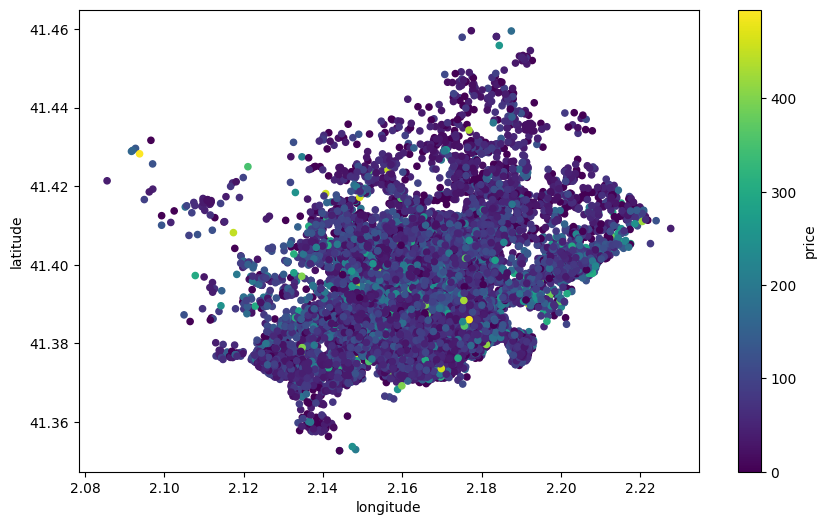

In [48]:
%%time
import matplotlib.pyplot as matp
airbnb_schema_pd_trimmed = airbnb_schema[airbnb_schema['price'] < 500]
airbnb_schema_pd_trimmed.plot.scatter(x='longitude', y='latitude', c='price', cmap=matp.get_cmap('viridis'), figsize=(10,6))

Here is the total execution time of the notebook

In [49]:
%time
end_time = time.time()
print(f"Total execution time: {(end_time - start_time):.2f} seconds")

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs
Total execution time: 4.11 seconds
